In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df = pd.read_csv("bitcoin_price_Training - Training.csv", na_values='-')

In [146]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,NaN,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,NaN,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,NaN,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,NaN,"1,491,160,000"


In [147]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [148]:
df.shape

(1556, 7)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1313 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [150]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume        243
Market Cap      0
dtype: int64

In [151]:
df.duplicated().sum()

0

In [152]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [153]:
df.Date = pd.to_datetime(df.Date)
#df.Date = df.Data.astype('datetime64[ns')

In [154]:
df.Date.min()

Timestamp('2013-04-28 00:00:00')

In [155]:
df.Date.max()

Timestamp('2017-07-31 00:00:00')

In [156]:
df[df.isna().any(axis=1)]

,Date,Open,High,Low,Close,Volume,Market Cap
1313,2013-12-26,683.94,777.75,683.94,761.98,NaN,"8,326,270,000"
1314,2013-12-25,666.31,682.70,649.48,682.21,NaN,"8,108,930,000"
1315,2013-12-24,672.36,684.39,645.71,665.58,NaN,"8,179,730,000"
1316,2013-12-23,613.06,680.91,611.04,673.41,NaN,"7,455,670,000"
1317,2013-12-22,601.78,666.74,585.64,617.18,NaN,"7,315,940,000"
...,...,...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21,NaN,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,NaN,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,NaN,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,NaN,"1,491,160,000"


In [157]:
df.Volume.str.replace(",","").astype(float)

0       8.605750e+08
1       7.059430e+08
2       8.037460e+08
3       1.380100e+09
4       7.891040e+08
            ...     
1551             NaN
1552             NaN
1553             NaN
1554             NaN
1555             NaN
Name: Volume, Length: 1556, dtype: float64

In [158]:
df.Volume = df.Volume.str.replace(",","").astype(float)

In [159]:
df.sort_index(ascending=False)

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,NaN,"1,500,520,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,NaN,"1,491,160,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,NaN,"1,597,780,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,NaN,"1,542,820,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,NaN,"1,292,190,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,7.891040e+08,"41,816,500,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1.380100e+09,"44,144,400,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,8.037460e+08,"46,246,700,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,7.059430e+08,"44,890,700,000"


In [161]:
# df.Volume.fillna(df.Volume.median(), inplace=True)
df.fillna({'Volume':df.Volume.median()}, inplace=True)

In [163]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,8.605750e+08,"45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,7.059430e+08,"44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,8.037460e+08,"46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1.380100e+09,"44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,7.891040e+08,"41,816,500,000"
...,...,...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21,4.530140e+07,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,4.530140e+07,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,4.530140e+07,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,4.530140e+07,"1,491,160,000"


In [168]:
df.Volume = df.Volume.astype(int)

In [169]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,860575000,45535800000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,705943000,44890700000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000,41816500000
...,...,...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21,45301400,1292190000
1552,2013-05-01,139.00,139.89,107.72,116.99,45301400,1542820000
1553,2013-04-30,144.00,146.93,134.05,139.00,45301400,1597780000
1554,2013-04-29,134.44,147.49,134.00,144.54,45301400,1491160000


In [178]:
df['Market Cap'].unique()

array([45535800000, 44890700000, 46246700000, ...,  1597780000,
        1491160000,  1500520000])

In [181]:
df['Market Cap'] = df['Market Cap'].str.replace(",","").astype(int)

AttributeError: Can only use .str accessor with string values!

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1556 non-null   int64         
 6   Market Cap  1556 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 85.2 KB


In [183]:
data = df.sort_index(ascending=False).reset_index()

In [184]:
data

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,45301400,1500520000
1,1554,2013-04-29,134.44,147.49,134.00,144.54,45301400,1491160000
2,1553,2013-04-30,144.00,146.93,134.05,139.00,45301400,1597780000
3,1552,2013-05-01,139.00,139.89,107.72,116.99,45301400,1542820000
4,1551,2013-05-02,116.38,125.60,92.28,105.21,45301400,1292190000
...,...,...,...,...,...,...,...,...
1551,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000,41816500000
1552,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
1553,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
1554,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,705943000,44890700000


In [185]:
data.drop('index', axis=1, inplace=True)

In [236]:
data

,Date,Open,High,Low,Close,Volume,Market Cap,Close_price_pct_change
0,2013-04-28,135.30,135.98,132.10,134.21,45301400,1500520000,NaN
1,2013-04-29,134.44,147.49,134.00,144.54,45301400,1491160000,7.696893
2,2013-04-30,144.00,146.93,134.05,139.00,45301400,1597780000,-3.832849
3,2013-05-01,139.00,139.89,107.72,116.99,45301400,1542820000,-15.834532
4,2013-05-02,116.38,125.60,92.28,105.21,45301400,1292190000,-10.069237
...,...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000,41816500000,5.626915
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000,5.136276
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,46246700000,-2.939114
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,705943000,44890700000,1.127107


In [237]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap',
       'Close_price_pct_change'],
      dtype='object')

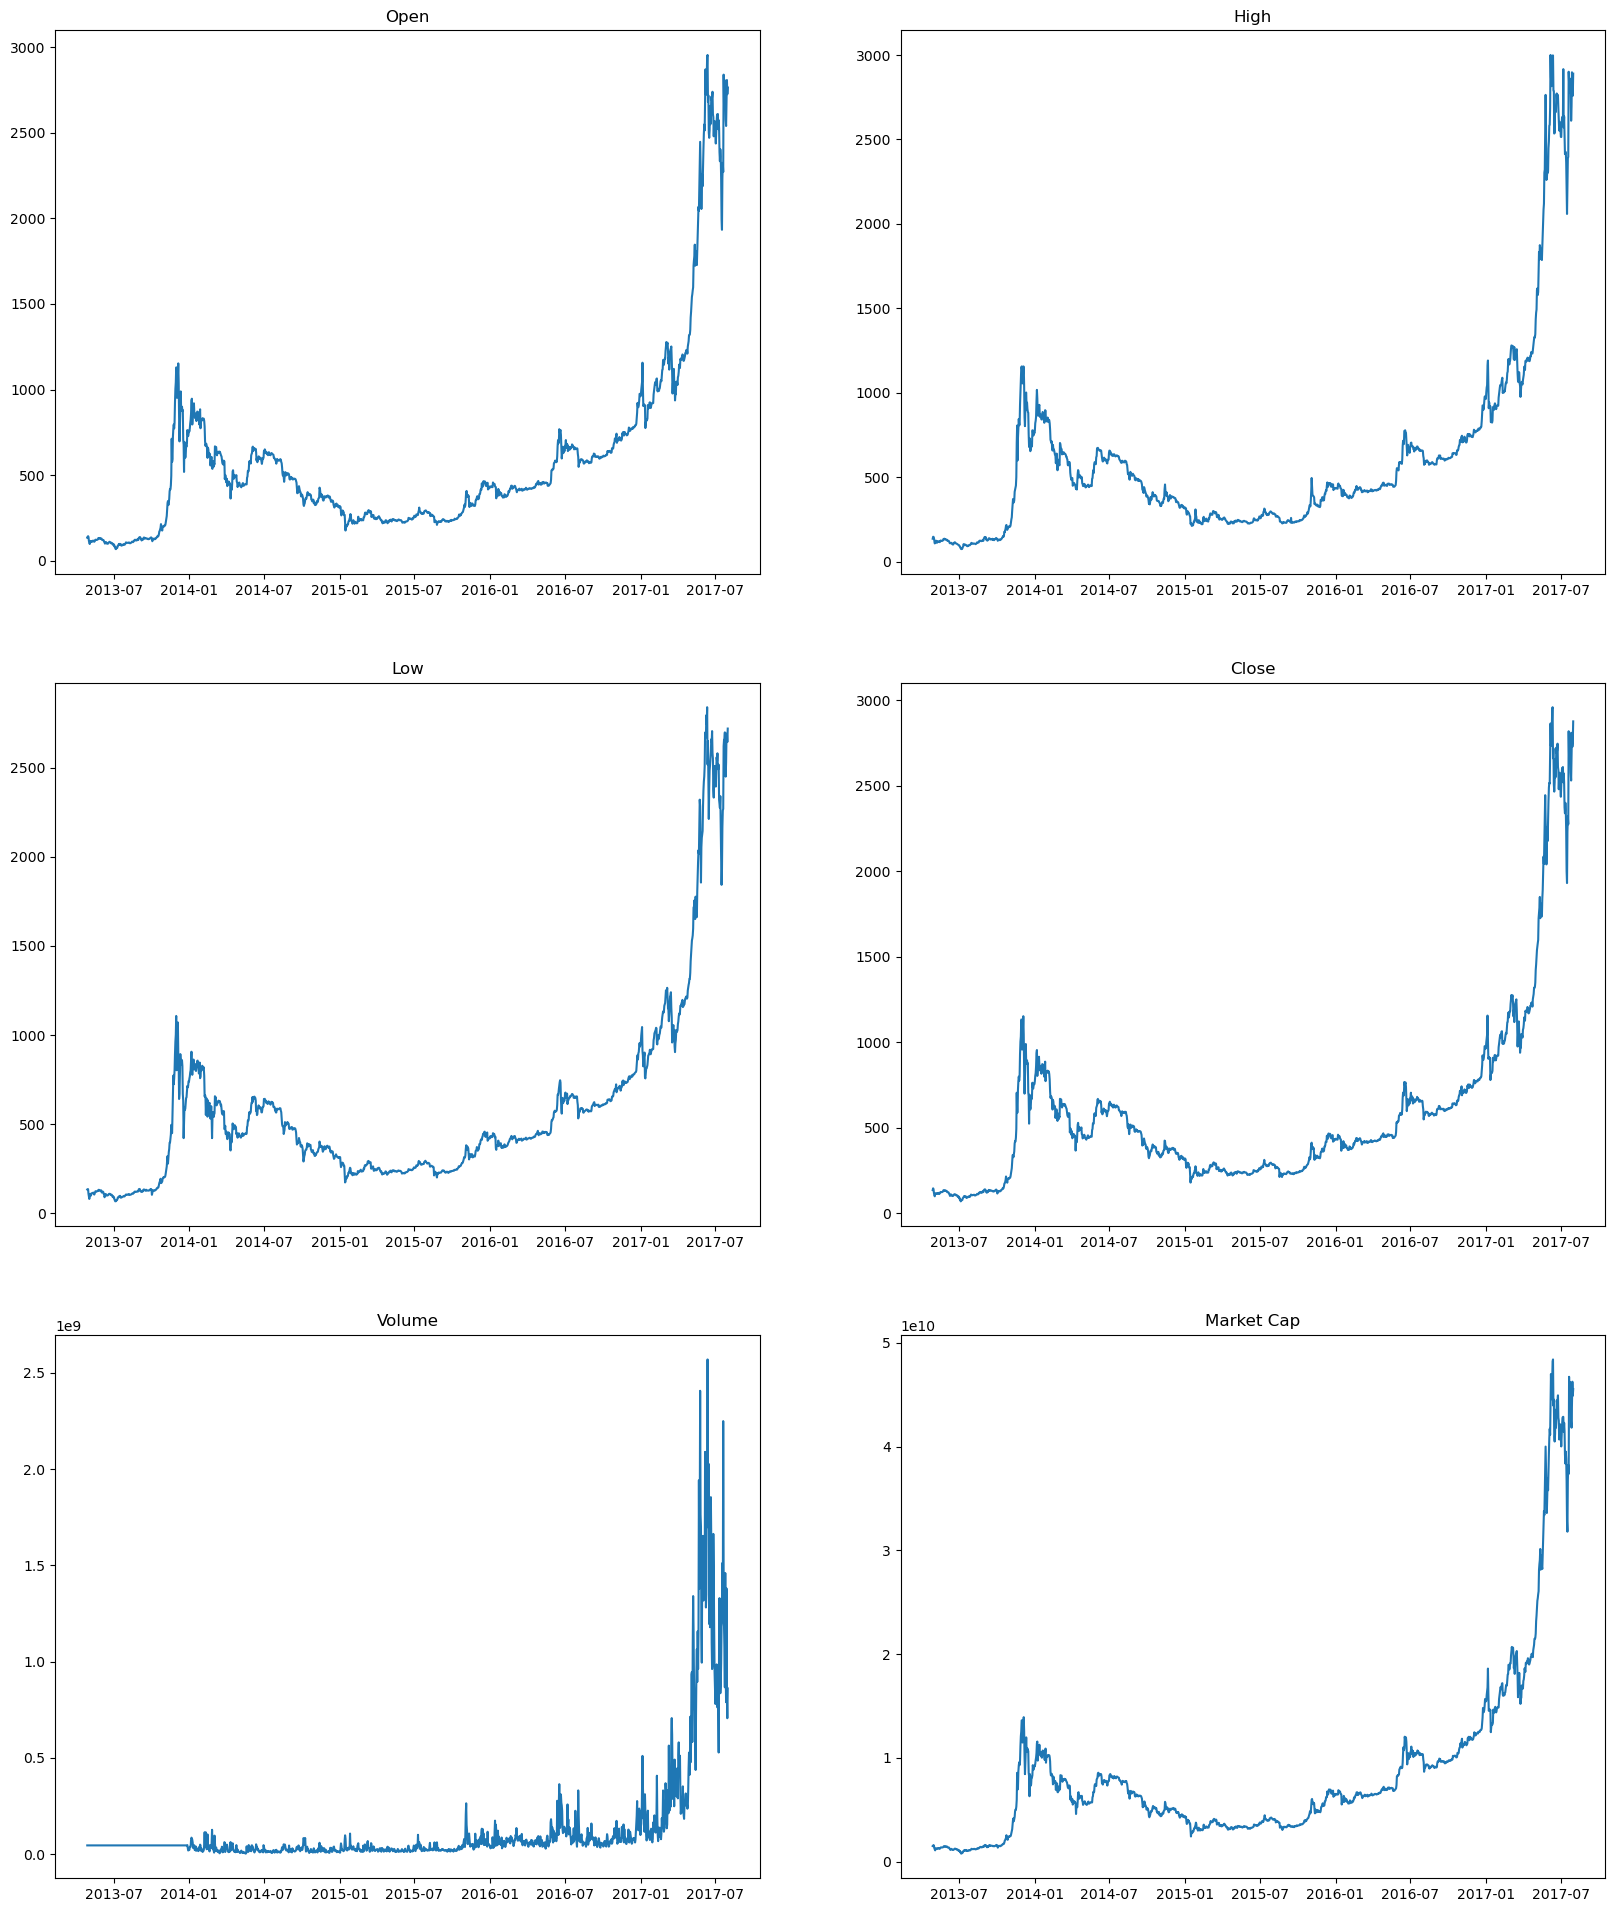

In [238]:
plt.figure(figsize=(20,24))
for index, col in enumerate(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'],1):
    plt.subplot(3,2,index)
    plt.plot(df.Date, df[col])
    plt.title(col)

In [244]:
bitcoin_sample = data[0:50]

In [245]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [246]:
init_notebook_mode(connected=True)

In [247]:
trace = go.Candlestick(x=bitcoin_sample.Date,
              high=bitcoin_sample.High,
              low=bitcoin_sample.Low,
              open=bitcoin_sample.Open,
              close=bitcoin_sample.Close)

In [248]:
candle_data = [trace]
layout = {
    'title':'Bitcoin Historical Price',
    'xaxis': {'title':'Date'}
}

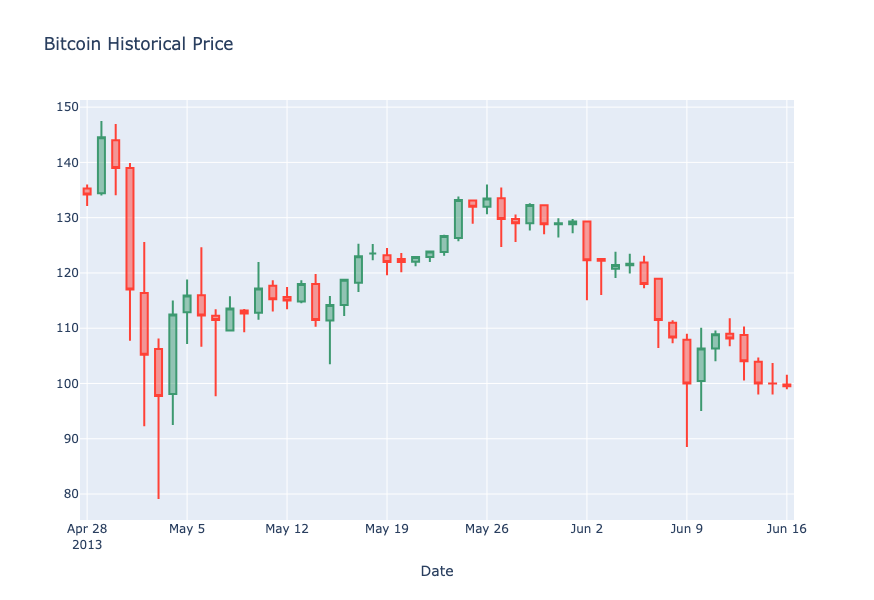

In [250]:
fig = go.Figure(data=candle_data, layout = layout)
fig.update_layout(xaxis_rangeslider_visible=False, width=850, height=600)
fig.show()

In [33]:
data.Close

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

<Axes: >

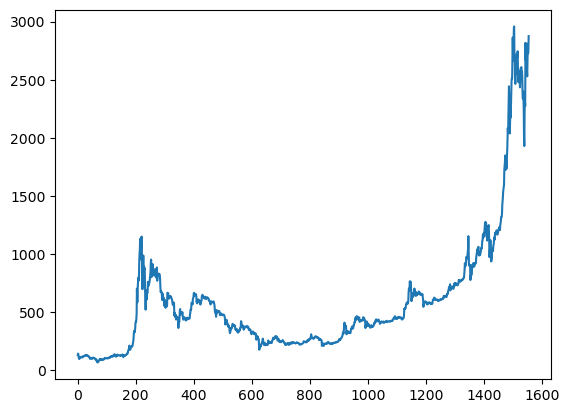

In [257]:
data.Close.plot()


In [258]:
data.set_index('Date', inplace = True)

In [259]:
data

,Open,High,Low,Close,Volume,Market Cap,Close_price_pct_change
Date,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,45301400,1500520000,NaN
2013-04-29,134.44,147.49,134.00,144.54,45301400,1491160000,7.696893
2013-04-30,144.00,146.93,134.05,139.00,45301400,1597780000,-3.832849
2013-05-01,139.00,139.89,107.72,116.99,45301400,1542820000,-15.834532
2013-05-02,116.38,125.60,92.28,105.21,45301400,1292190000,-10.069237
...,...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,789104000,41816500000,5.626915
2017-07-28,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000,5.136276
2017-07-29,2807.02,2808.76,2692.80,2726.45,803746000,46246700000,-2.939114


<Axes: xlabel='Date'>

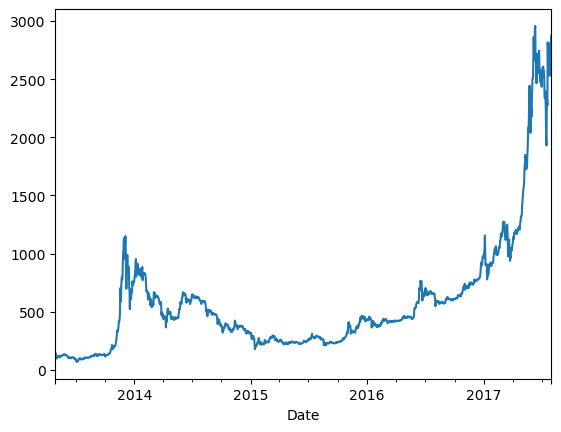

In [260]:
data.Close.plot()

In [262]:
np.log1p(data.Close)

Date
2013-04-28    4.906829
2013-04-29    4.980451
2013-04-30    4.941642
2013-05-01    4.770600
2013-05-02    4.665418
                ...   
2017-07-27    7.890874
2017-07-28    7.940943
2017-07-29    7.911122
2017-07-30    7.922326
2017-07-31    7.964274
Name: Close, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

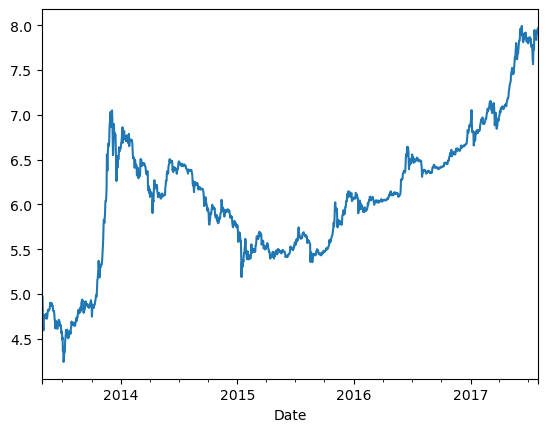

In [42]:
np.log1p(data.Close).plot()

<Axes: xlabel='Date'>

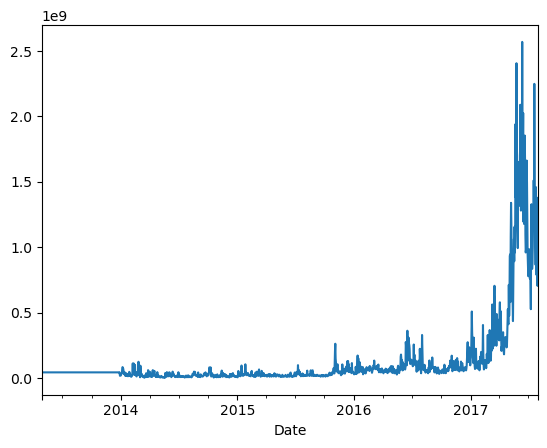

In [267]:
data.Volume.plot()

<Axes: xlabel='Date'>

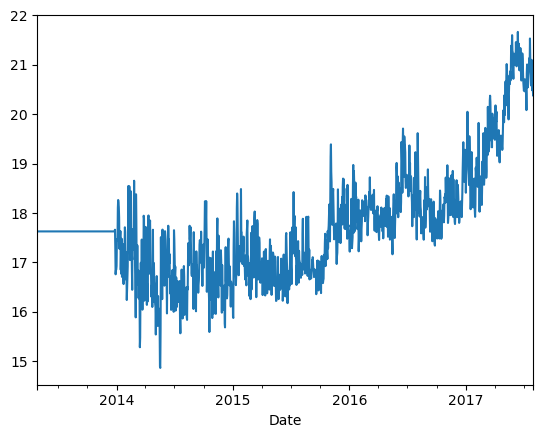

In [268]:
np.log1p(data.Volume).plot()

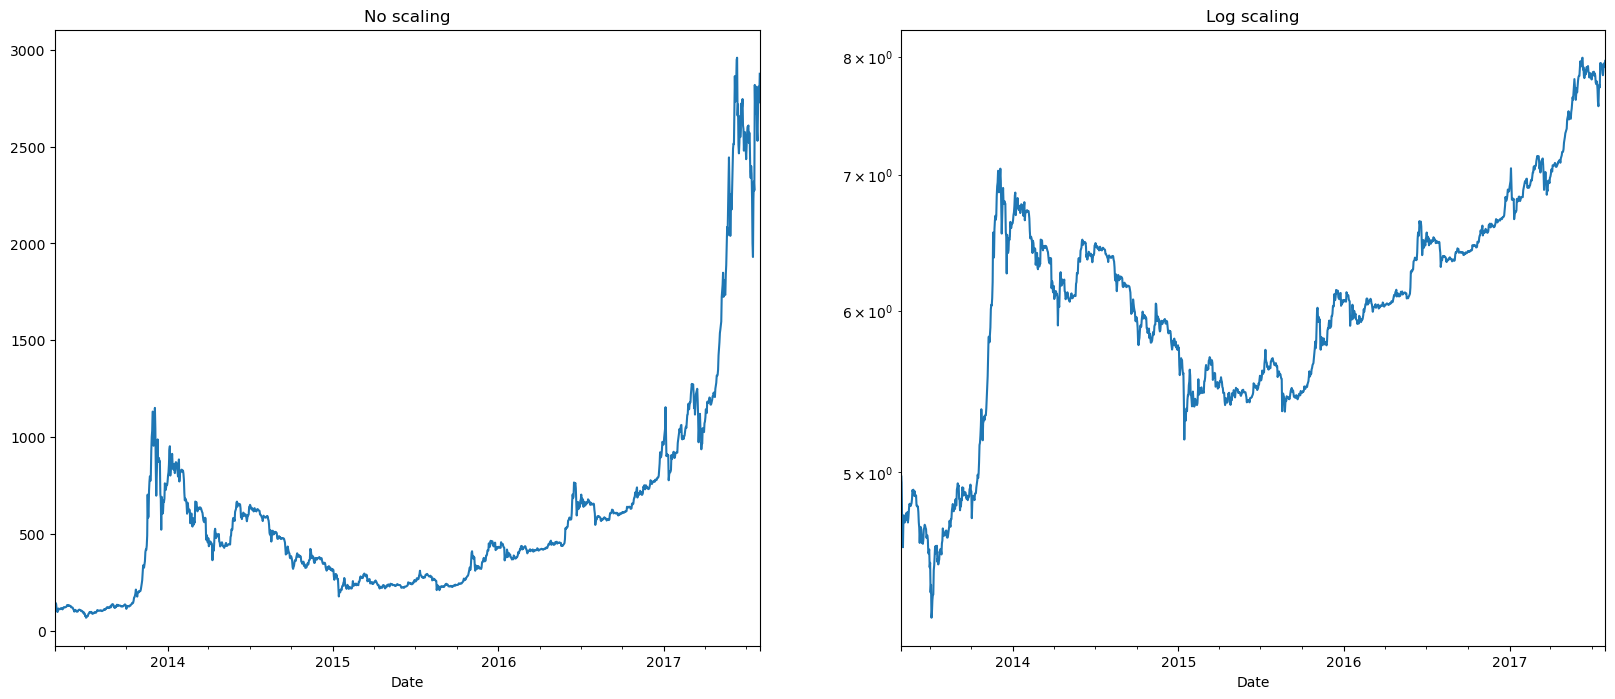

In [285]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
data.Close.plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(data.Close).plot()
plt.title('Log scaling')
plt.yscale('log')

Analyse closing price on yearly, quarterly, monthly basis (Weeky and Daily also done)

In [286]:
data.Close.resample('YE').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: YE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

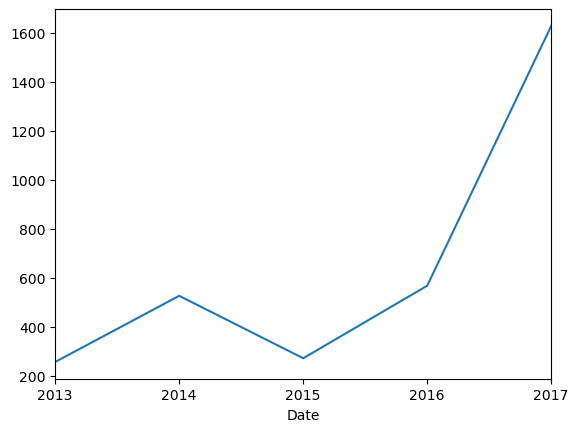

In [287]:
data.Close.resample('YE').mean().plot()

In [288]:
data.Close.resample('QE').mean()

Date
2013-06-30     115.162188
2013-09-30     111.291196
2013-12-31     502.657609
2014-03-31     700.586000
2014-06-30     520.929341
2014-09-30     534.055435
2014-12-31     357.075761
2015-03-31     251.209333
2015-06-30     236.858022
2015-09-30     254.859891
2015-12-31     346.037065
2016-03-31     410.728571
2016-06-30     512.492747
2016-09-30     615.702283
2016-12-31     732.721413
2017-03-31    1034.707444
2017-06-30    1912.552198
2017-09-30    2519.418387
Freq: QE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

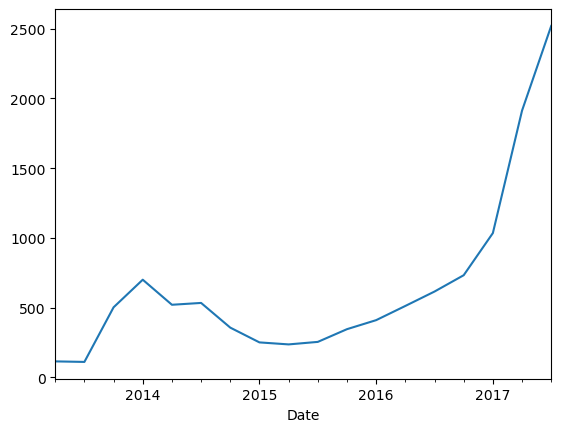

In [289]:
data.Close.resample('QE').mean().plot()

In [290]:
data.Close.resample('ME').mean()

Date
2013-04-30     139.250000
2013-05-31     119.993226
2013-06-30     107.761333
2013-07-31      90.512258
2013-08-31     113.905161
2013-09-30     130.061667
2013-10-31     158.311935
2013-11-30     550.420667
2013-12-31     800.780968
2014-01-31     844.168387
2014-02-28     661.618214
2014-03-31     592.200323
2014-04-30     461.362000
2014-05-31     486.651290
2014-06-30     615.917333
2014-07-31     618.025484
2014-08-31     536.087742
2014-09-30     445.186333
2014-10-31     364.150000
2014-11-30     366.100000
2014-12-31     341.268387
2015-01-31     248.782581
2015-02-28     234.153571
2015-03-31     269.041290
2015-04-30     235.491667
2015-05-31     236.996774
2015-06-30     238.081000
2015-07-31     279.563871
2015-08-31     250.734516
2015-09-30     233.595333
2015-10-31     264.855161
2015-11-30     348.883333
2015-12-31     424.464516
2016-01-31     410.844516
2016-02-29     404.408276
2016-03-31     416.525161
2016-04-30     434.339333
2016-05-31     461.953871
2016-06

<Axes: xlabel='Date'>

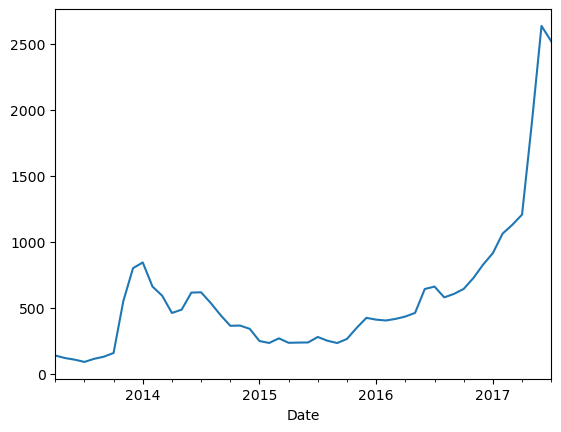

In [298]:
data.Close.resample('ME').mean().plot()

In [299]:
data.Close.resample('W').mean()

Date
2013-04-28     134.210000
2013-05-05     118.842857
2013-05-12     113.925714
2013-05-19     118.710000
2013-05-26     127.732857
                 ...     
2017-07-09    2569.241429
2017-07-16    2232.730000
2017-07-23    2549.514286
2017-07-30    2689.315714
2017-08-06    2875.340000
Freq: W-SUN, Name: Close, Length: 224, dtype: float64

<Axes: xlabel='Date'>

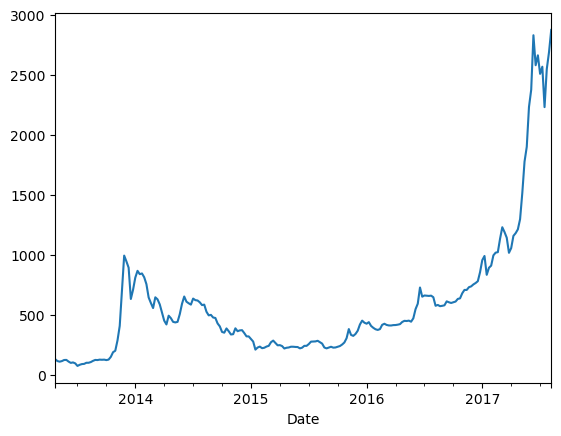

In [300]:
data.Close.resample('W').mean().plot()

In [301]:
data.Close.resample('D').mean()

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Freq: D, Name: Close, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

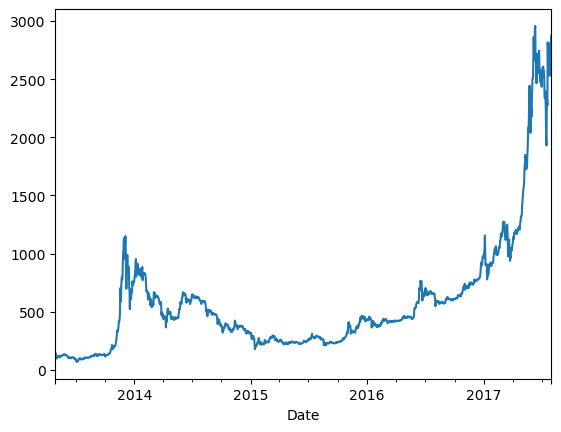

In [302]:
data.Close.resample('D').mean().plot()

Analysing Daily Change in Closing price of the stocks

In [304]:
data.Close

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [305]:
data['Close_price_pct_change'] = data.Close.pct_change()*100

<Axes: xlabel='Date'>

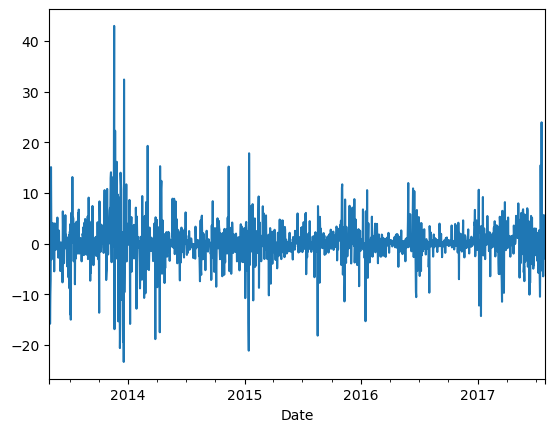

In [306]:
data['Close_price_pct_change'].plot()

In [307]:
import cufflinks as cf

In [308]:
cf.go_offline()

In [309]:
data['Close_price_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

In [310]:
type(data['Close_price_pct_change'])

pandas.core.series.Series

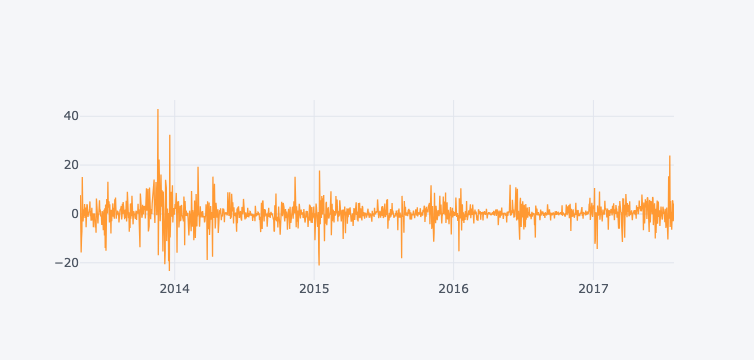

In [315]:
data['Close_price_pct_change'].iplot()